# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings for presentation
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

### Understanding the structure of the data

In [117]:
# read the data
df = pd.read_csv('../csvfiles/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

# Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# #### Observations:
The dataframe above has columns that need dtype "object" changed to "category."
rating is object data type.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


In [7]:
df.isnull().sum()# To check missing values 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values.
Memory space has been reduced.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [18]:
#statistical summary of the data
df.describe(include='all') 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


In [64]:
# statistical summary of the numerical data.
df.describe(include='int64')

,order_id,customer_id,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.000000,33.000000,68.000000


In [12]:
#maximum time
df["food_preparation_time"].max()

35

In [13]:
#minimum time 
df["food_preparation_time"].min()

20

In [111]:
#Average 
df["food_preparation_time"].mean()

27.371970495258168

#### Observations:
1.The mean and Median of food_preparation_time are 27.1 & 27.00 respectively. 
2.Not much variation in food preparation and delivery time . 
3.American is most ordered in cuisine type. 
4.Shake shack is tops among all restaurants.

In [83]:
# Question 5: How many orders are not rated?[1 mark]

df1 = df[df['rating'] == 'Not given']
len(df1)

736

#### Observations:
Orders not rated are 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

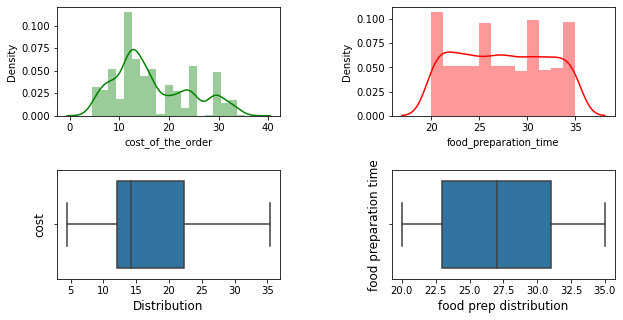

In [84]:
#Distribution of Cost details with displot
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (10,5),gridspec_kw={'width_ratios': [6, 6],'height_ratios': [5, 5],
                       'wspace': 0.5,
                       'hspace': 0.5})

plot00=sns.distplot(df['cost_of_the_order'],ax=axes[0][0],color='g')


#Distribution of Food Preparation with displot
plot01=sns.distplot(df['food_preparation_time'],ax=axes[0][1],color='r')


 
#Boxplot for Cost of orders

plot10=sns.boxplot(df['cost_of_the_order'],ax=axes[1][0])
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':12})
axes[1][0].set_ylabel('cost',fontdict={'fontsize':12})


#Food Distribution-Boxplot
plot11=sns.boxplot(df['food_preparation_time'],ax=axes[1][1])
axes[1][1].set_xlabel('food prep distribution',fontdict={'fontsize':12})
axes[1][1].set_ylabel('food preparation time',fontdict={'fontsize':12})
plt.show()


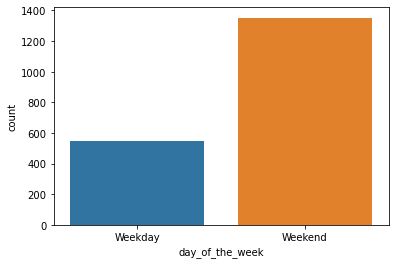

In [103]:
# use countplot to plot orders on Weekdays &Weekends
sns.countplot(x='day_of_the_week', data=df)
plt.show()

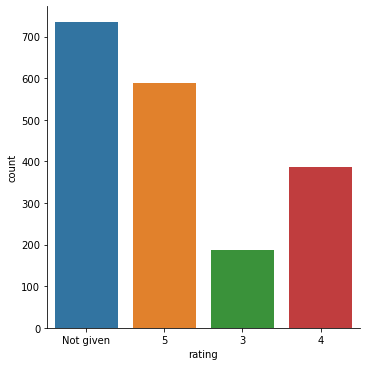

In [104]:
sns.catplot('rating', data=df, kind='count')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [42]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack tops the restaurant in terms of the number of orders and Parm the last in top 5 places.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [110]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [43]:

orders_20 = len(df[df['cost_of_the_order']>20])#orders greater than 20
total_orders=len(df)
per_20=(orders_20/total_orders)*100 #percentage
per_20

29.24130663856691

#### Observations:
29 percentage of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [44]:
#take mean od delivery time
mean_data = df['delivery_time'].mean()
print("Mean:", mean_data)

Mean: 24.161749209694417


#### Observations:

The mean of delivery time for orders is 24.16.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [97]:

df['customer_id'].value_counts().head(5) 

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations:
Customer holding ID 52832 placed the maximum number of orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


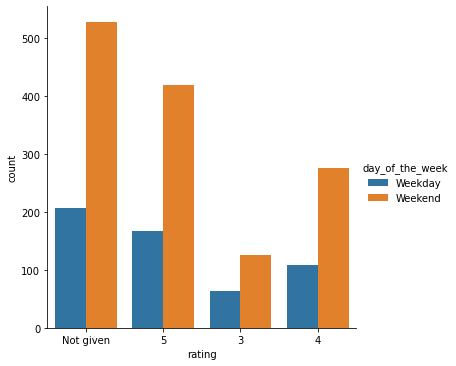

In [99]:
# Analyze how rating affects On weekdays and weekends
sns.catplot(x='rating', data=df, hue='day_of_the_week', kind='count')
plt.show()

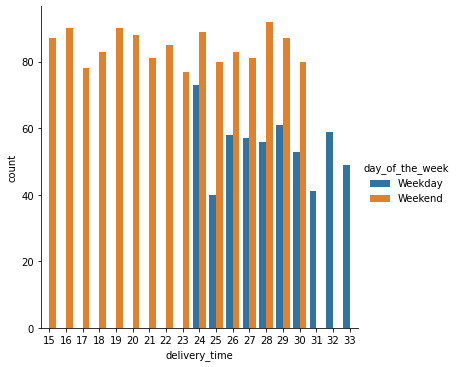

In [102]:
# Analyze how delivery time affects on Weekdays&Weekends
sns.catplot(x='delivery_time', data=df, hue='day_of_the_week', kind='count')
plt.show()

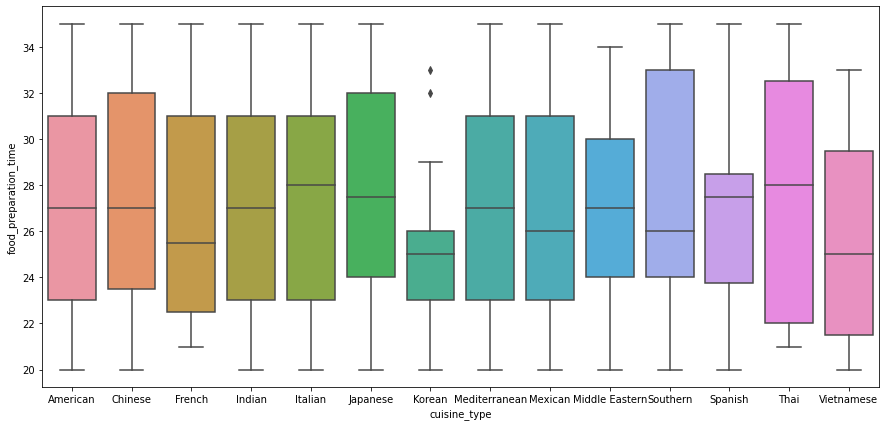

In [105]:
# Analyze the distribution of delivery time
plt.figure(figsize=(15,7))

sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.show()

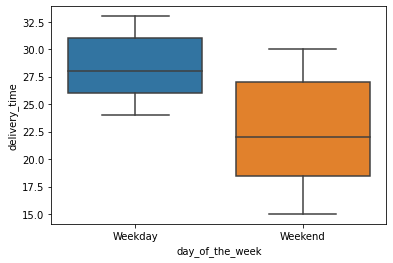

In [106]:
# Analyse the affect of delivery_time on day_of_the_week
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

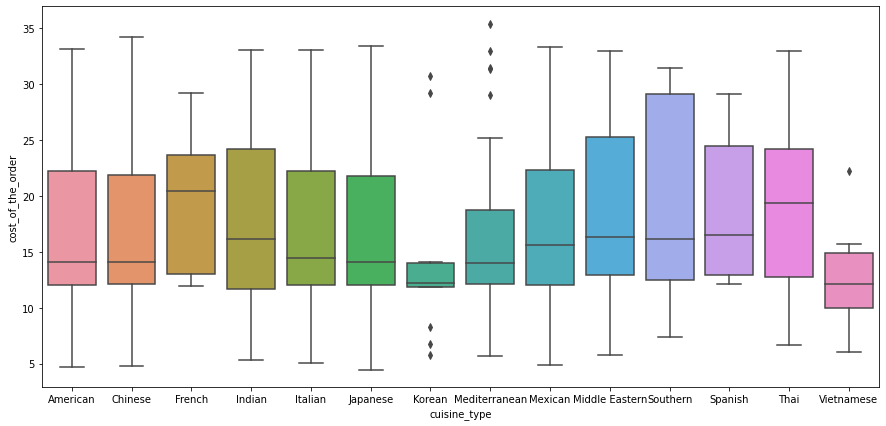

In [107]:
# Analyse the affect of cost of order  on cuisine type.
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)

plt.show()

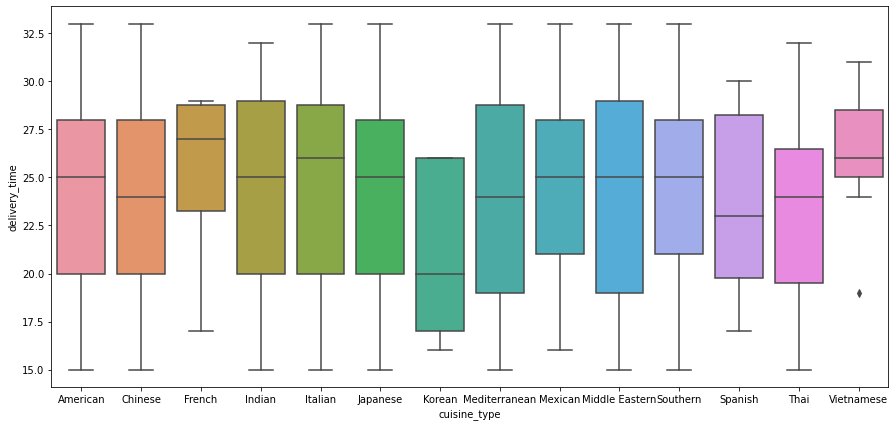

In [108]:
# Analyse the affect of delivery time  on cuisine type.
plt.figure(figsize=(15,7))

sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [77]:

df1 = df[df['rating'] != 'Not given']
#Convert rating to int
df1['rating'] = df1['rating'].astype('int') 
# count of ratings  using groupby() and count()
df2 = df1.groupby(['restaurant_name'])['rating'].count().reset_index()
df3 = df2[df2['rating']>50]['restaurant_name']
df3.head()
# Create a dataframe that contains the restaurant names with their rating counts
df1
df2 = df1.groupby(['restaurant_name'])['rating'].count().reset_index()
df2.head()
# Get the restaurant names that have rating count more than 50

df4=df1[df1['restaurant_name'].isin(df3)].copy()
# Finding average ratings for each movie and sorting them out in descending order

df5=df4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
df5

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [ ]:
#### Observations:
All the restaurants mentioned has average rating of 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [123]:
# Write the code here
def total(col):
    if col > 20:
        return col*0.25
    elif col > 5:
        return col*0.15
    else:
        return col*0
df['Rev'] = df['cost_of_the_order'].apply(total)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Rev
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,1.7385


In [127]:
total_rev = df['Rev'].sum()
total_rev


The net revenue is around 6166.3 dollars


In [ ]:
#### Observations:
Revenue can be generated on this data provided.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [21]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_20 = len(df[df['total_time']>60])
total_orders=len(df)
per_20=(orders_20/total_orders)*100
per_20

10.537407797681771

#### Observations:
Only 10 percentage of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [80]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']# Weekend 
df_weekend['delivery_time'].mean()


22.4700222057735

In [81]:
df_weekend1 = df[df['day_of_the_week'] == 'Weekday']#Weekday
df_weekend1['delivery_time'].mean()

28.340036563071298

#### Observations:
Mean delivery time on Weekend is less compared to Weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
#Conclusions

1.Ratings were given more on weekends.
2.Delivery time for  cuisine type Korean,Vietnamese varies compared to others.
3.Cost of the cuisine type Korean,Vietnamese & Mediterranean have more outliers. 
4.Shake Shack tops the restaurant in terms of the number of orders.
5.American is the most popular cuisine on weekends.
6.Most of the orders were placed on weekends.

#Recommendations
1.Customers prefer restaurants with affordable cost and less delivery time according to the analysis.
2.Food aggregator company FoodHub can expect more orders on weekends which  will help in improving Business standards.
3.Delivery time is  main criteria by the customers while accessing the food app,so restaurants with minimum time range would be most approached.
4.Orders placed by most of the customers prefer to give rating on weekends ,strategies are to be implemented on weekends rather than weekdays.